In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
data = session.query(Measurement.date, Measurement.station, Measurement.prcp, Measurement.tobs).\
    order_by(Measurement.date.asc()).all()
data

[('2010-01-01', 'USC00519397', 0.08, 65.0),
 ('2010-01-01', 'USC00513117', 0.28, 67.0),
 ('2010-01-01', 'USC00518838', 0.21, 72.0),
 ('2010-01-01', 'USC00519523', 0.15, 75.0),
 ('2010-01-01', 'USC00519281', 0.15, 70.0),
 ('2010-01-01', 'USC00511918', 0.05, 66.0),
 ('2010-01-01', 'USC00516128', 0.14, 73.0),
 ('2010-01-02', 'USC00519397', 0.0, 63.0),
 ('2010-01-02', 'USC00513117', 0.0, 65.0),
 ('2010-01-02', 'USC00518838', 0.02, 73.0),
 ('2010-01-02', 'USC00519523', 0.0, 75.0),
 ('2010-01-02', 'USC00519281', 0.0, 62.0),
 ('2010-01-02', 'USC00511918', 0.0, 70.0),
 ('2010-01-02', 'USC00516128', 0.0, 61.0),
 ('2010-01-03', 'USC00519397', 0.0, 74.0),
 ('2010-01-03', 'USC00513117', 0.0, 75.0),
 ('2010-01-03', 'USC00518838', 0.0, 67.0),
 ('2010-01-03', 'USC00519523', 0.0, 77.0),
 ('2010-01-03', 'USC00519281', 0.0, 74.0),
 ('2010-01-03', 'USC00511918', 0.0, 75.0),
 ('2010-01-03', 'USC00516128', 0.0, 76.0),
 ('2010-01-04', 'USC00519397', 0.0, 76.0),
 ('2010-01-04', 'USC00513117', 0.0, 76.0),
 ('

In [11]:
data_date = [item[0] for item in data]
data_station = [item[1] for item in data]
data_prcp = [item[2] for item in data]
data_tobs = [item[3] for item in data]

In [12]:
hawaii_measurements = pd.DataFrame({
    'Date' : data_date,
    'Station' : data_station,
    'Precip' : data_prcp,
    'Tobs' : data_tobs
})
hawaii_measurements

,Date,Station,Precip,Tobs
0,2010-01-01,USC00519397,0.08,65.0
1,2010-01-01,USC00513117,0.28,67.0
2,2010-01-01,USC00518838,0.21,72.0
3,2010-01-01,USC00519523,0.15,75.0
4,2010-01-01,USC00519281,0.15,70.0
5,2010-01-01,USC00511918,0.05,66.0
6,2010-01-01,USC00516128,0.14,73.0
7,2010-01-02,USC00519397,0.00,63.0
8,2010-01-02,USC00513117,0.00,65.0
9,2010-01-02,USC00518838,0.02,73.0


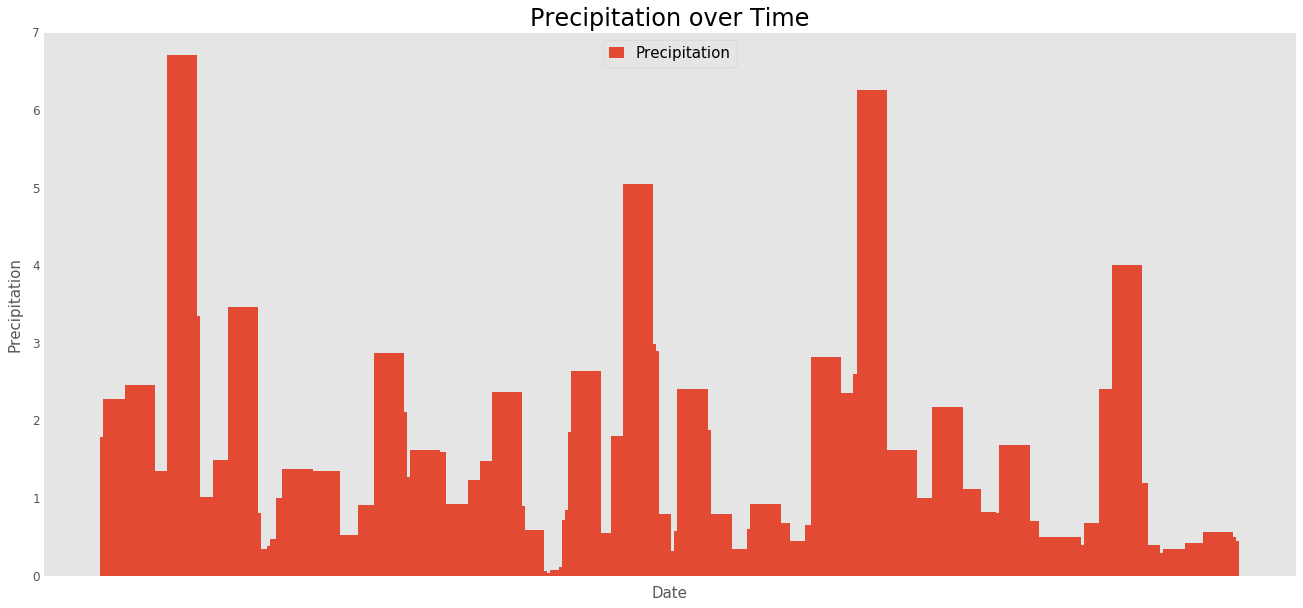

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
hawaii_measurements_2017 = hawaii_measurements.loc[hawaii_measurements['Date']>'2016-08-22']
#hawaii_measurements_2017
x=hawaii_measurements_2017['Date']
y=hawaii_measurements_2017['Precip']
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.bar(x,y,width = 10, label ='Precipitation')
plt.title ('Precipitation over Time', fontsize = 24)
plt.xlabel('Date', labelpad = 10 , fontsize = 15)
plt.xticks([])
plt.yticks(fontsize = 12)
plt.ylim(0,7)
plt.ylabel('Precipitation',labelpad =10, fontsize = 15)
plt.legend( loc = 9,handlelength=1, fontsize = 15)
plt.grid(which='major',axis ='both')
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [15]:
hawaii_measurements_2017.Precip.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precip, dtype: float64

In [16]:
# Design a query to show how many stations are available in this dataset?
station_summary_data = session.query(Measurement.station).\
    group_by(Measurement.station).all()
len(station_summary_data)

9

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stationdetail_data = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stationdetail_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station281_data = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter_by(station = 'USC00519281').all()
station281_data

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [19]:
# On sqlite you would need to convert your text. Following might help:
station281_data = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').filter(Measurement.date >= '2016-08-22').all()


In [20]:
temp_281 = [thing[0] for thing in station281_data]
Temp = pd.DataFrame({
                    'Temperature':temp_281})
Temp

,Temperature
0,78.0
1,77.0
2,77.0
3,80.0
4,80.0
5,75.0
6,73.0
7,78.0
8,77.0
9,78.0


In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

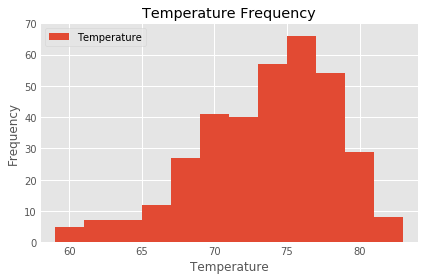

In [22]:
Temp.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.title('Temperature Frequency')
plt.xlim(58,84)
plt.ylim(0,70)
plt.tight_layout()
plt.show()

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start = '2017-08-14'
end = '2017-08-23'
vacation = calc_temps(start,end)    
print(calc_temps(start,end))

[(70.0, 78.475, 85.0)]


In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
vacation_list = list(np.ravel(vacation))
vacation_df = pd.DataFrame({
    'Min':vacation_list[0],
    'Max':vacation_list[2],
    'Avg_Temp':vacation_list[1],
    'Peak_to_Peak': vacation_list[2]- vacation_list[0]
}, index= [0])
vacation_df1=vacation_df[['Avg_Temp']]
vacation_df1

,Avg_Temp
0,78.475


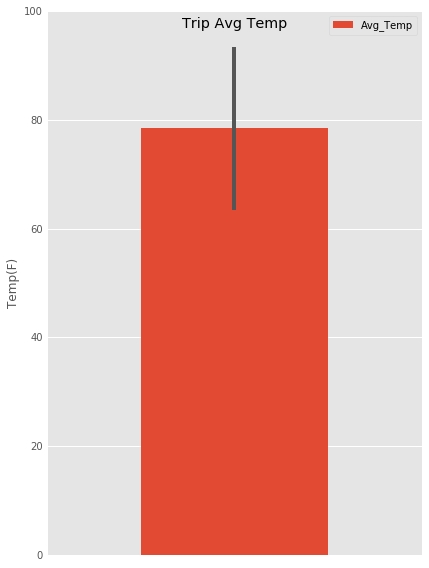

In [26]:
vacation_df1.plot(kind='bar',yerr= vacation_df['Peak_to_Peak'],figsize=(6,10))
plt.title('Trip Avg Temp', pad =-17)
plt.xticks([])
plt.ylabel('Temp(F)')
plt.ylim(0,100)
plt.show()

In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

calc_weather_station_summary = session.query(Measurement.station, func.sum(Measurement.prcp)).\
        filter(Measurement.date >= start).filter(Measurement.date <= end).all()
for item in calc_weather_station_summary:
    print(item)

('USC00519397', 3.6999999999999997)


In [28]:
station_summary_data = session.query(Measurement.station,func.sum(Measurement.prcp)).\
    filter(Measurement.date >= start).filter(Measurement.date <= end).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
station_summary_data
vacation_station = [thing[0] for thing in station_summary_data]
vacation_prcp = [thing[1] for thing in station_summary_data]

vacation_summary = pd.DataFrame({
    'Station Code': vacation_station,
    'Precipitation' : vacation_prcp
})
vacation_summary

,Station Code,Precipitation
0,USC00516128,2.79
1,USC00519281,0.51
2,USC00519523,0.34
3,USC00514830,0.04
4,USC00519397,0.02


In [29]:
station_geo_data = session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation).\
    all()
station_geo_data
vacation_station_id = [x[0] for x in station_geo_data]
vacation_station_name = [x[1] for x in station_geo_data]
vacation_station_lat = [x[2] for x in station_geo_data]
vacation_station_lng = [x[3] for x in station_geo_data]
vacation_station_elev = [x[4] for x in station_geo_data]

vacation_station_info = pd.DataFrame({
    'Station Code': vacation_station_id,
    'Station Name' : vacation_station_name,
    'Station Latitude' : vacation_station_lat,
    'Station Longitude' : vacation_station_lng,
    'Station Elevation' : vacation_station_elev
})
vacation_station_info.head()

,Station Code,Station Name,Station Latitude,Station Longitude,Station Elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [30]:
vacation_summary = vacation_summary.merge(vacation_station_info, on='Station Code',how = 'left')

In [31]:
vacation_summary = vacation_summary[['Station Name','Precipitation','Station Latitude','Station Longitude','Station Elevation']]
vacation_summary

,Station Name,Precipitation,Station Latitude,Station Longitude,Station Elevation
0,"MANOA LYON ARBO 785.2, HI US",2.79,21.33310,-157.80250,152.4
1,"WAIHEE 837.5, HI US",0.51,21.45167,-157.84889,32.9
2,"WAIMANALO EXPERIMENTAL FARM, HI US",0.34,21.33556,-157.71139,19.5
3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.04,21.52130,-157.83740,7.0
4,"WAIKIKI 717.2, HI US",0.02,21.27160,-157.81680,3.0


## Optional Challenge Assignment

In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [33]:
from datetime import datetime
start = '2017-08-13'
start = datetime.strptime(start,'%Y-%m-%d')
start

datetime.datetime(2017, 8, 13, 0, 0)

In [34]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
from datetime import timedelta
# Set the start and end date of the trip
daily_normal_list = []
date_list = []
for i in range(0,10):
    start += timedelta(days=1)
    daily_normal_list.append(daily_normals(start.strftime("%m-%d")))
    date_list.append(start.strftime("%Y-%m-%d"))
print(list(daily_normal_list))
# Use the start and end date to create a range of dates
print(list(date_list))
# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[[(71.0, 76.77777777777777, 82.0)], [(69.0, 76.47169811320755, 83.0)], [(69.0, 76.08, 83.0)], [(69.0, 76.125, 83.0)], [(70.0, 76.92307692307692, 84.0)], [(69.0, 75.94642857142857, 85.0)], [(68.0, 76.45283018867924, 82.0)], [(67.0, 76.4, 83.0)], [(69.0, 76.47169811320755, 84.0)], [(67.0, 76.6923076923077, 87.0)]]
['2017-08-14', '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19', '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23']


In [35]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normal_tmin = [x[0][0] for x in daily_normal_list]
normal_tavg = [x[0][1] for x in daily_normal_list]
normal_tmax = [x[0][2] for x in daily_normal_list]
date_list
normal_tmin

[71.0, 69.0, 69.0, 69.0, 70.0, 69.0, 68.0, 67.0, 69.0, 67.0]

In [36]:
normals_info = pd.DataFrame({
    'Date': date_list,
    'tmin' : normal_tmin,
    'tavg' : normal_tavg,
    'tmax' : normal_tmax
},index=date_list)
normals_info

,Date,tmin,tavg,tmax
2017-08-14,2017-08-14,71.0,76.777778,82.0
2017-08-15,2017-08-15,69.0,76.471698,83.0
2017-08-16,2017-08-16,69.0,76.080000,83.0
2017-08-17,2017-08-17,69.0,76.125000,83.0
2017-08-18,2017-08-18,70.0,76.923077,84.0
2017-08-19,2017-08-19,69.0,75.946429,85.0
2017-08-20,2017-08-20,68.0,76.452830,82.0
2017-08-21,2017-08-21,67.0,76.400000,83.0
2017-08-22,2017-08-22,69.0,76.471698,84.0
2017-08-23,2017-08-23,67.0,76.692308,87.0


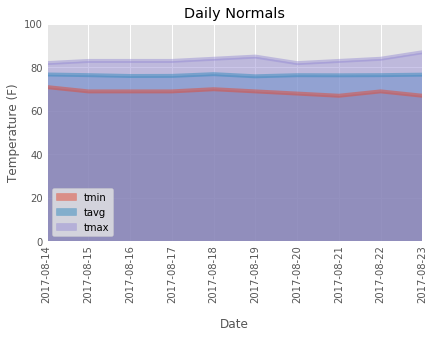

In [37]:
# Plot the daily normals as an area plot with `stacked=False`
normals_info_plot = normals_info.plot.area(stacked=False)
plt.title('Daily Normals')
plt.xticks(rotation =90)
plt.xlabel('Date',labelpad = 15)
plt.ylabel('Temperature (F)')
plt.ylim(0,100)
plt.show()

In [38]:
json_file = hawaii_measurements_2017.merge(vacation_station_info,how='left', left_on='Station',right_on='Station Code')
json_file = json_file[['Date','Station', 'Station Name', 'Precip', 'Tobs','Station Latitude','Station Longitude','Station Elevation']]
json_file

,Date,Station,Station Name,Precip,Tobs,Station Latitude,Station Longitude,Station Elevation
0,2016-08-23,USC00519397,"WAIKIKI 717.2, HI US",0.00,81.0,21.27160,-157.81680,3.0
1,2016-08-23,USC00513117,"KANEOHE 838.1, HI US",0.15,76.0,21.42340,-157.80150,14.6
2,2016-08-23,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.05,80.0,21.52130,-157.83740,7.0
3,2016-08-23,USC00517948,"PEARL CITY, HI US",NaN,80.0,21.39340,-157.97510,11.9
4,2016-08-23,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.02,80.0,21.33556,-157.71139,19.5
5,2016-08-23,USC00519281,"WAIHEE 837.5, HI US",1.79,77.0,21.45167,-157.84889,32.9
6,2016-08-23,USC00516128,"MANOA LYON ARBO 785.2, HI US",0.70,74.0,21.33310,-157.80250,152.4
7,2016-08-24,USC00519397,"WAIKIKI 717.2, HI US",0.08,79.0,21.27160,-157.81680,3.0
8,2016-08-24,USC00513117,"KANEOHE 838.1, HI US",2.15,76.0,21.42340,-157.80150,14.6
9,2016-08-24,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2.28,80.0,21.52130,-157.83740,7.0


In [39]:
json_file['Precip'].dropna(inplace=True)

In [40]:
date_precip_list = []
date_precip_list.append(dict(zip(json_file['Date'],json_file['Precip'])))
date_precip_list

[{'2016-08-23': 0.08,
  '2016-08-24': 0.08,
  '2016-08-25': 0.03,
  '2016-08-26': 0.18,
  '2016-08-27': 0.14,
  '2016-08-28': 0.04,
  '2016-08-29': 0.0,
  '2016-08-30': 0.24,
  '2016-08-31': 0.0,
  '2016-09-01': 0.07,
  '2016-09-02': 0.14,
  '2016-09-03': 0.18,
  '2016-09-04': 1.0,
  '2016-09-05': 1.35,
  '2016-09-06': 0.15,
  '2016-09-07': 0.35,
  '2016-09-08': 0.18,
  '2016-09-09': 0.31,
  '2016-09-10': 0.46,
  '2016-09-11': 1.84,
  '2016-09-12': 0.17,
  '2016-09-13': 0.01,
  '2016-09-14': 0.23,
  '2016-09-15': 0.01,
  '2016-09-16': 0.0,
  '2016-09-17': 0.06,
  '2016-09-18': 0.02,
  '2016-09-19': 0.0,
  '2016-09-20': 0.0,
  '2016-09-21': 0.0,
  '2016-09-22': 0.06,
  '2016-09-23': 0.0,
  '2016-09-24': 0.0,
  '2016-09-25': 0.49,
  '2016-09-26': 0.31,
  '2016-09-27': 0.14,
  '2016-09-28': 0.03,
  '2016-09-29': 0.0,
  '2016-09-30': 0.03,
  '2016-10-01': 0.01,
  '2016-10-02': 0.0,
  '2016-10-03': 0.0,
  '2016-10-04': 0.0,
  '2016-10-05': 0.0,
  '2016-10-06': 0.28,
  '2016-10-07': 0.02,
  

In [41]:
Stations = json_file.groupby(['Station Name'])['Precip'].sum().reset_index()
Stations.drop(['Precip'],axis=1,inplace=True)

IndexError: index 2026 is out of bounds for size 2021

In [ ]:
len(Stations)

In [ ]:
Stations_List = []
Stations_List.append(dict(Stations['Station Name']))
Stations_List

In [ ]:
len(json_file)

In [ ]:
date_tobs_list = []
date_tobs_list.append(dict(zip(json_file['Date'],json_file['Tobs'])))
date_tobs_list